In [15]:
import os
os.getcwd()

'C:\\Users\\schung'

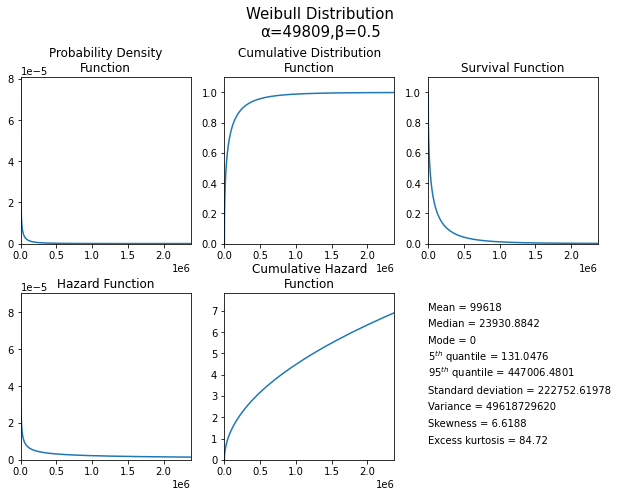

In [40]:
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=49809, beta=0.5)  # this created the distribution object
dist.plot()
print (dist)

In [31]:
from reliability.Fitters import Fit_Weibull_2P
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_life=pd.read_csv("Lidar_Field_Failure_Data for python.csv")


fail = df_life['F'].dropna().tolist()
censor=df_life['S'].tolist()

df_life.describe()


,F,S
count,25,326
mean,7.39,15.0364
std,8.78665,14.0138
min,0.01,0.02
25%,0.83,4.175
50%,2.56,12.075
75%,12.38,20.89
max,32.47,90.86


In [32]:
print (fail)

[22.37, 32.47, 0.23, 12.38, 1.13, 15.26, 0.66, 11.66, 1.3, 1.3, 4.91, 19.77, 2.56, 15.1, 2.13, 0.32, 0.07, 0.83, 0.03, 16.79, 4.09, 1.03, 11.76, 6.59, 0.01]


Results from Fit_Weibull_2P (90% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 351/326 (48.15362% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.9642         1.69169   26.3111   31.8848
     Beta        0.937651       0.0407039  0.873033   1.00705 

Goodness of fit    Value
 Log-likelihood -1525.16
           AICc  3054.33
            BIC  3063.35
             AD  15.3014 



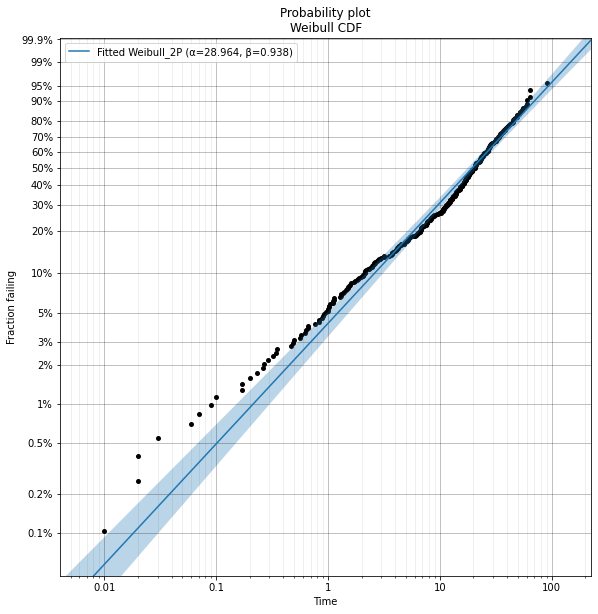

In [33]:

wb = Fit_Weibull_2P(failures=life_time, right_censored=censor, show_probability_plot=True, print_results=True, CI=0.9, quantiles=None, CI_type='time', method='MLE', optimizer=None, force_beta=None, downsample_scatterplot=True)

Results from Fit_Weibull_2P (90% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 3/2 (40% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          108.28         129.464    15.151   773.846
     Beta        0.500774        0.257647  0.214837   1.16727 

Goodness of fit    Value
 Log-likelihood -15.2154
           AICc  40.4307
            BIC  33.6496
             AD  19.2742 



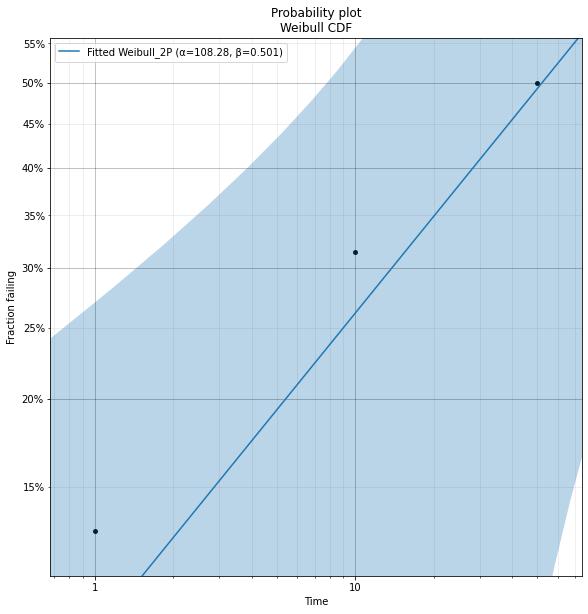

In [35]:

life=[1,10,50]
censor=[100,100]

wb = Fit_Weibull_2P(failures=life, right_censored=censor, show_probability_plot=True, print_results=True, CI=0.9, quantiles=None, CI_type='time', method='MLE', optimizer=None, force_beta=None, downsample_scatterplot=True)

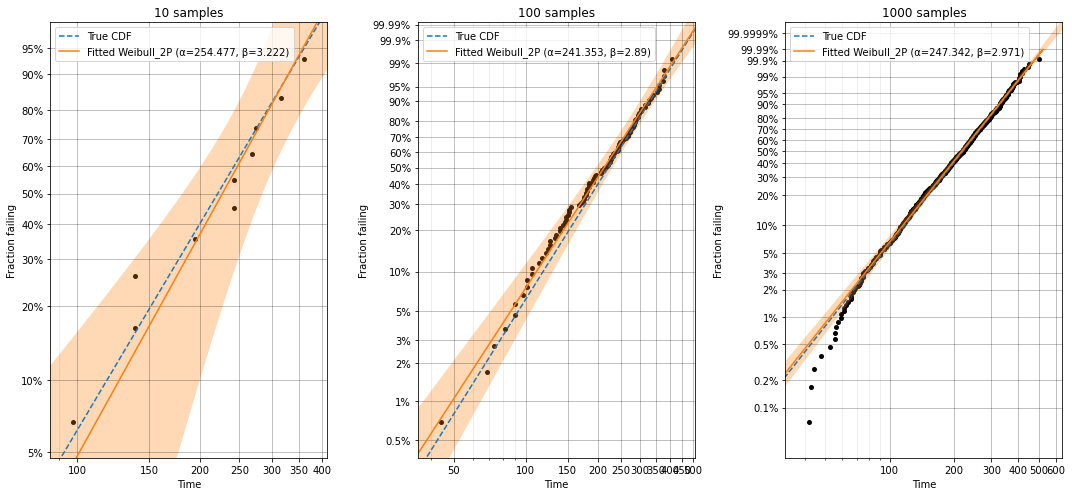

In [3]:
from reliability.Distributions import Weibull_Distribution
from reliability.Probability_plotting import Weibull_probability_plot
import matplotlib.pyplot as plt
dist = Weibull_Distribution(alpha=250, beta=3)
for i, x in enumerate([10,100,1000]):
    plt.subplot(131 + i)
    dist.CDF(linestyle='--', label='True CDF')
    failures = dist.random_samples(x, seed=42) # take 10, 100, 1000 samples
    Weibull_probability_plot(failures=failures) # this is the probability plot
    plt.title(str(str(x) + ' samples'))
plt.gcf().set_size_inches(15, 7) # adjust the figure size after creation. Necessary˓→to do it after as it it automatically adjusted within probability_plot
plt.tight_layout()
plt.show()

In [42]:
25/325


0.07692307692307693